# **Analítica Computacional para la Toma de Decisiones**

## Taller 1: python y datos

Daniel Benavides -202220428

<d.benavidess@uniandes.edu.co>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Exploración y limpieza de datos en python

In [2]:
df = pd.read_csv('BikePrices.csv')

### 5. Ahora tome los datos BikePrices.csv que encontrará en Bloque Neón. Cargue los datos en un nuevo cuaderno. En este cuaderno realice 10 operaciones de exploración y limpieza que considere relevantes. Para cada celda de código incluya una celda de markdown para explicar la operación realizada. Incluya el cuaderno como parte de su entrega (archivo de soporte).

5.1 | Con df.head(), accedemos al dataframe y revisamos las 5 entradas más recientes.

In [3]:
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


5.2 | Con df.tail(), visualizamos las Ãºltimas 5 filas del dataframe. Esto complementa df.head() y nos ayuda a verificar la consistencia de los datos al final del archivo.

In [4]:
df.tail()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
1056,Royal,Royal Enfield Electra 5 S,90000,2012,Individual,1st owner,40000,NaN
1057,Hero,Hero Honda Hunk,20000,2010,Individual,1st owner,17000,NaN
1058,Bajaj,Bajaj Pulsar 220 DTS-i,60000,2014,Individual,1st owner,16000,NaN
1059,Hero,Hero Honda CBZ extreme,40000,2009,Individual,1st owner,50000,NaN
1060,Hero,Hero Honda CBZ extreme,35000,2012,Individual,1st owner,60000,NaN


5.3 | Con df.columns, obtenemos la lista de nombres de todas las columnas del dataframe. Esto es útil para conocer las variables disponibles en nuestro dataset.

In [5]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

5.4 | Con df.dtypes, verificamos el tipo de dato de cada columna. Esto nos permite identificar si necesitamos convertir alguna columna a un tipo de dato diferente.

In [6]:
df.dtypes

Brand                 object
Model                 object
Selling_Price          int64
Year                   int64
Seller_Type           object
Owner                 object
KM_Driven              int64
Ex_Showroom_Price    float64
dtype: object

5.5 | Con df['Brand'].value_counts(), contamos la frecuencia de cada marca en el dataset. Esto nos muestra qué marcas de motos son más comunes en nuestros datos.

In [7]:
df['Brand'].value_counts()

Brand
Bajaj       260
Hero        232
Honda       204
Royal       109
Yamaha      102
TVS          69
Suzuki       30
KTM          24
Mahindra      6
Kawasaki      4
Vespa         4
UM            3
Jawa          3
Activa        3
Harley        2
Aprilia       2
Yo            1
Benelli       1
Hyosung       1
BMW           1
Name: count, dtype: int64

5.6 | Con df['Year'].unique(), obtenemos los años únicos presentes en el dataset. Esto nos ayuda a identificar el rango temporal de las motos incluidas.

In [8]:
df['Year'].unique()

array([2017, 2011, 2010, 2012, 2015, 2014, 2009, 2016, 2006, 2013, 2018,
       2007, 2019, 2008, 2001, 2004, 2005, 2020, 2000, 2002, 1997, 1988,
       1999, 1998, 1991, 2003, 1993, 1995])

5.7 | Con df.sort_values(), ordenamos el dataframe por la columna 'Selling_Price' de mayor a menor. Esto nos permite identificar rápidamente las motos más caras del dataset.

In [9]:
df.sort_values('Selling_Price', ascending=False).head(10)

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
624,Suzuki,Suzuki GSX S750,760000,2019,Individual,1st owner,2800,752020.0
625,Harley,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0
623,Kawasaki,Kawasaki Ninja 650 [2018-2019],425000,2017,Individual,2nd owner,13600,599000.0
619,Yamaha,Yamaha YZF R3,365000,2019,Individual,1st owner,1127,351680.0
621,Harley,Harley-Davidson Street 750,330000,2014,Individual,4th owner,6500,534000.0
620,Kawasaki,Kawasaki Ninja 300,300000,2016,Individual,1st owner,9800,360000.0
618,BMW,BMW G310GS,300000,2018,Individual,1st owner,2500,349000.0
622,Kawasaki,Kawasaki Ninja 650 [2018-2019],300000,2011,Individual,1st owner,12000,589000.0
681,Royal,Royal Enfield Continental GT 650,299000,2019,Individual,1st owner,1500,NaN
768,Royal,Royal Enfield Interceptor 650,285000,2019,Individual,1st owner,5500,NaN


5.8 | Con .cumsum(), calculamos la suma acumulada de los kilómetros recorridos de las primeras 20 motos. Esta función nos muestra cómo se acumula el total de kilómetros progresivamente.

In [10]:
df['KM_Driven'].head(20).cumsum()

0       8000
1      43000
2      53000
3      96000
4     131000
5     216000
6     261000
7     289000
8     341000
9     355289
10    386289
11    436289
12    486289
13    519884
14    537334
15    561334
16    578784
17    598784
18    636518
19    666518
Name: KM_Driven, dtype: int64

5.9 | Con df.sample(), seleccionamos 5 filas aleatorias del dataframe. Esto nos da una vista aleatoria de los datos para explorar muestras diversas del conjunto.

In [11]:
df.sample(5)

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
17,Mahindra,Mahindra Flyte,22000,2009,Individual,3rd owner,20000,44493.0
473,Honda,Honda CB Hornet 160R,55000,2017,Individual,1st owner,14000,87543.0
220,Honda,Honda Activa 5G,55000,2019,Individual,1st owner,9000,59422.0
620,Kawasaki,Kawasaki Ninja 300,300000,2016,Individual,1st owner,9800,360000.0
277,Hero,Hero Ignitor,36000,2016,Individual,1st owner,23000,65599.0


5.10 | Con df.isnull().sum(), identificamos cuÃ¡ntos valores nulos hay en cada columna. Esta es una operación fundamental de limpieza para detectar datos faltantes que requieren tratamiento.

In [12]:
df.isnull().sum()

Brand                  0
Model                  0
Selling_Price          0
Year                   0
Seller_Type            0
Owner                  0
KM_Driven              0
Ex_Showroom_Price    435
dtype: int64

## 3. Visualización de datos en python

### 4. Ahora tome los datos BikePrices.csv que encontrará en Bloque Neón. Cargue los datos en un nuevo cuaderno. En este cuaderno realice 5 visualizaciones que considere relevantes. Para cada celda de código incluya una celda de markdown para explicar la visualización y su interpretación. Incluya el cuaderno como parte de su entrega (archivo de soporte).

4.1 | Histograma de Selling_Price. Esta visualización muestra la distribución de los precios de venta de las motos, permitiéndonos identificar el rango de precios más común en el mercado de motos usadas.

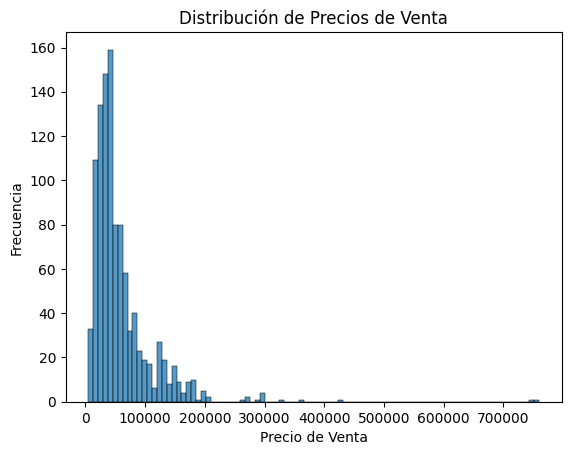

In [13]:
sns.histplot(data=df, x='Selling_Price')
plt.title('Distribución de Precios de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.show()

4.2 | Scatter plot de KM_Driven vs Selling_Price. Este gráfico nos ayuda a visualizar la relación entre los kilómetros recorridos y el precio de venta, esperando observar que a mayor kilometraje, menor sea el precio.

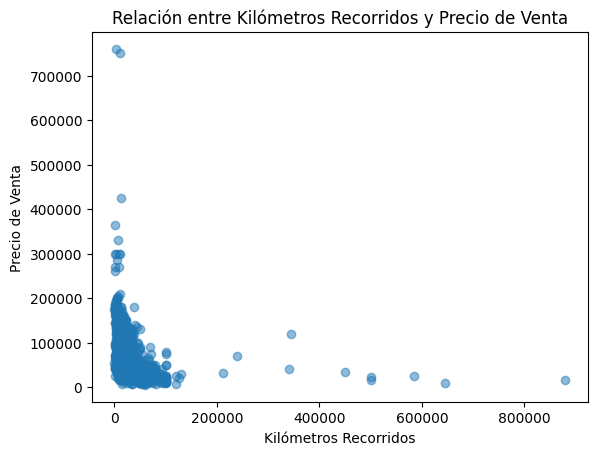

In [14]:
plt.scatter(df['KM_Driven'], df['Selling_Price'], alpha=0.5)
plt.title('Relación entre Kilómetros Recorridos y Precio de Venta')
plt.xlabel('Kilómetros Recorridos')
plt.ylabel('Precio de Venta')
plt.show()

4.3 | Histograma de Year con hue por Owner. Esta visualización nos permite comparar la distribución de años de las motos según el tipo de propietario.

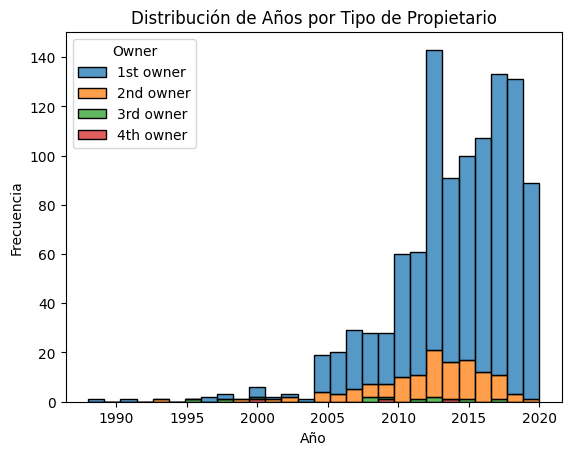

In [15]:
sns.histplot(data=df, x='Year', hue='Owner', multiple='stack')
plt.title('Distribución de Años por Tipo de Propietario')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()

4.4 | Violin plot de Selling_Price por Brand (top 5 marcas). Este diagrama de violín nos muestra la distribución de precios para las 5 marcas más comunes.

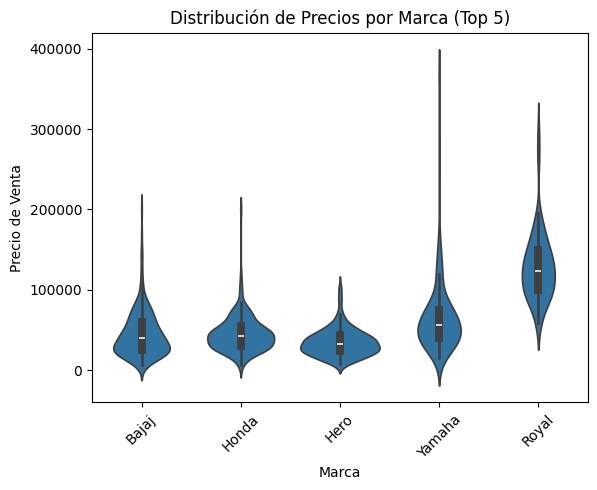

In [16]:
top_brands = df['Brand'].value_counts().head(5).index
df_top = df[df['Brand'].isin(top_brands)]
sns.violinplot(data=df_top, x='Brand', y='Selling_Price')
plt.title('Distribución de Precios por Marca (Top 5)')
plt.xlabel('Marca')
plt.ylabel('Precio de Venta')
plt.xticks(rotation=45)
plt.show()

4.5 | Scatter plot de Year vs Selling_Price coloreado por Owner. Esta visualización nos permite identificar tendencias en los precios según el año y tipo de propietario.

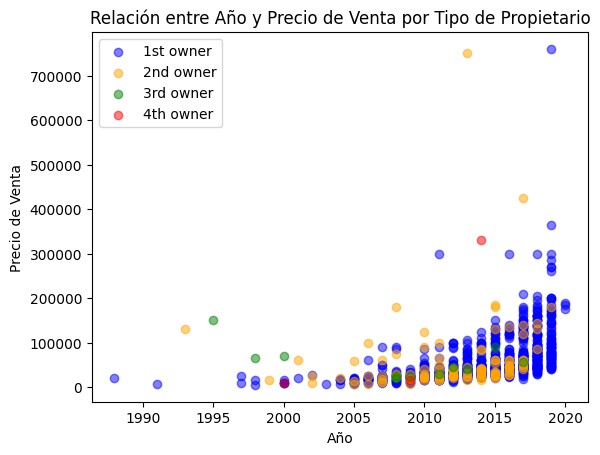

In [17]:
owner_colors = {'1st owner': 'blue', '2nd owner': 'orange', '3rd owner': 'green', '4th owner': 'red'}
for owner, color in owner_colors.items():
    subset = df[df['Owner'] == owner]
    plt.scatter(subset['Year'], subset['Selling_Price'], alpha=0.5, label=owner, c=color)

plt.title('Relación entre Año y Precio de Venta por Tipo de Propietario')
plt.xlabel('Año')
plt.ylabel('Precio de Venta')
plt.legend()
plt.show()